# Wine Dataset Clustering & Exploration :: PCA and K-Means Analysis

This notebook applies unsupervised learning techniques to explore and cluster the classic wine dataset. The analysis combines principal component analysis (PCA) for dimensionality reduction and k-means clustering to identify patterns and segmentations within the data.

**Highlights:**
- Data cleaning and exploratory analysis of wine features.
- Application of PCA for visualizing data structure and reducing complexity.
- Systematic use of k-means clustering with performance metrics (WCSS, silhouette score).
- Interpretation and visualization of resulting clusters to derive meaningful insights.

This project represents a comprehensive workflow for revealing hidden structures and actionable findings in complex tabular datasets.



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=";")

In [ ]:
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)


In [ ]:
X = data.drop('quality', axis=1)
y = data['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model_1 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


model_3 = Sequential([
    Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])


In [ ]:

model_1.compile(optimizer=Adam(learning_rate=0.005),
                loss='binary_crossentropy',
                metrics=['accuracy'])


model_2.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])


model_3.compile(optimizer=Adam(learning_rate=0.0005),
                loss='binary_crossentropy',
                metrics=['accuracy'])


In [ ]:

history_1 = model_1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


history_2 = model_2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


history_3 = model_3.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6343 - loss: 0.6621 - val_accuracy: 0.8867 - val_loss: 0.2846
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8718 - loss: 0.3424 - val_accuracy: 0.8906 - val_loss: 0.2534
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8765 - loss: 0.3116 - val_accuracy: 0.8867 - val_loss: 0.2354
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8581 - loss: 0.3599 - val_accuracy: 0.9023 - val_loss: 0.2362
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8585 - loss: 0.3493 - val_accuracy: 0.8984 - val_loss: 0.2339
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8742 - loss: 0.2991 - val_accuracy: 0.8945 - val_loss: 0.2359
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8706 - loss: 0.3209 - val_accuracy: 0.9023 - val_loss: 0.2294
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8822 - loss: 0.2913 - val_accuracy: 0.9062 - val_loss

In [ ]:

loss_1, accuracy_1 = model_1.evaluate(X_test, y_test, verbose=0)


loss_2, accuracy_2 = model_2.evaluate(X_test, y_test, verbose=0)


loss_3, accuracy_3 = model_3.evaluate(X_test, y_test, verbose=0)


print(f"Model 1 - Accuracy: {accuracy_1:.2f}")
print(f"Model 2 - Accuracy: {accuracy_2:.2f}")
print(f"Model 3 - Accuracy: {accuracy_3:.2f}")


Model 1 - Accuracy: 0.87
Model 2 - Accuracy: 0.87
Model 3 - Accuracy: 0.88


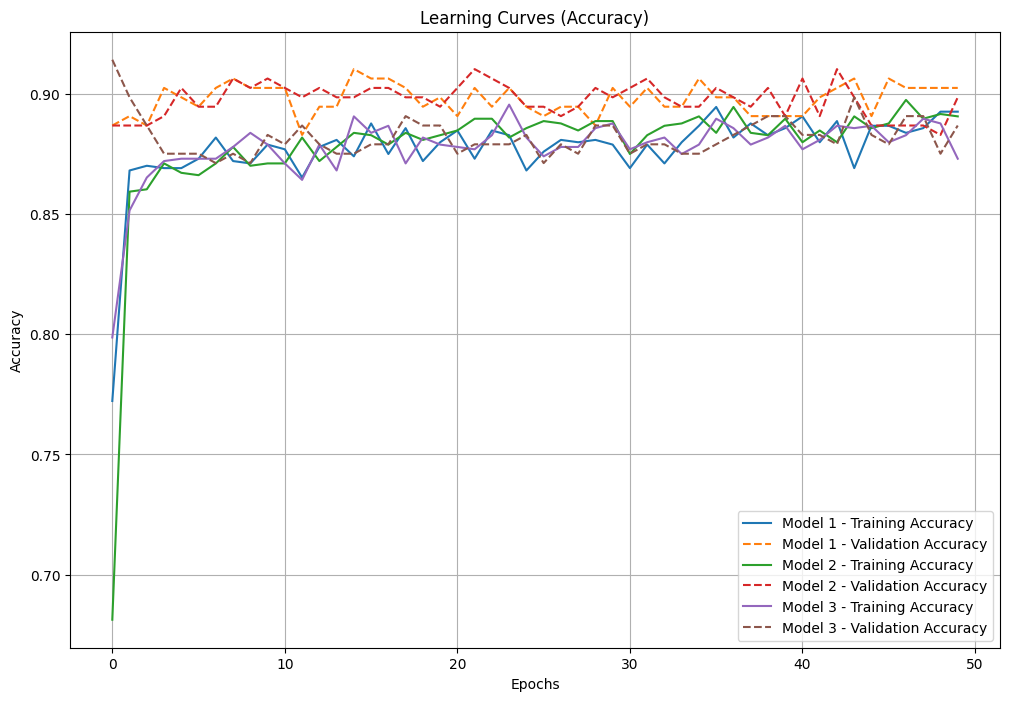

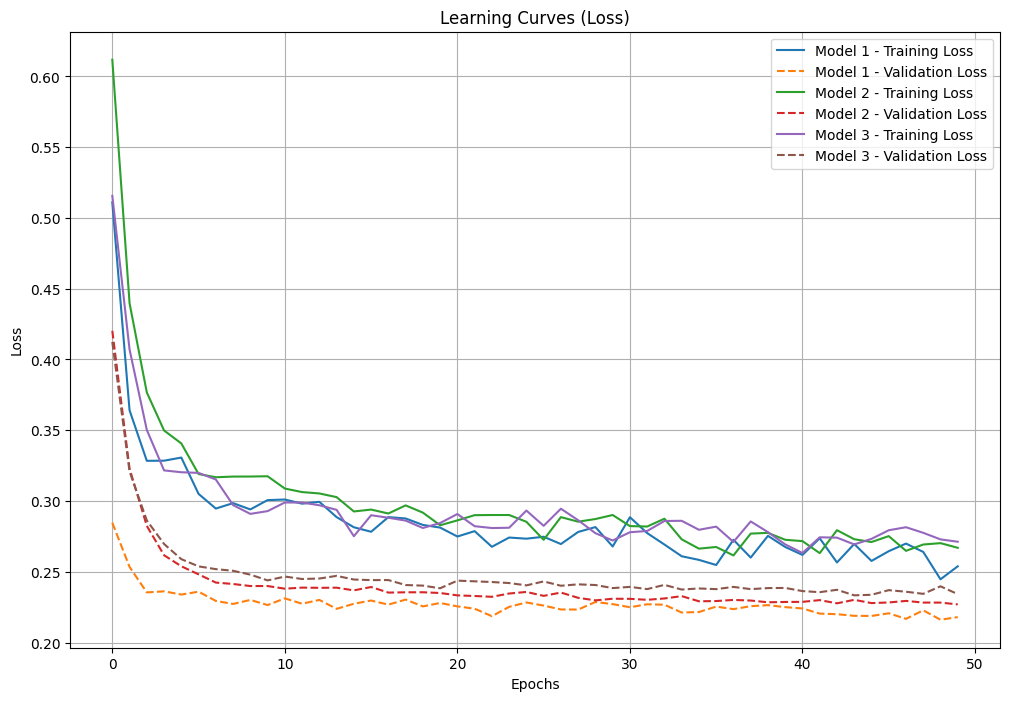

In [ ]:
import matplotlib.pyplot as plt


def plot_learning_curves(histories, model_names):
    plt.figure(figsize=(12, 8))


    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'{model_names[i]} - Training Accuracy')
        plt.plot(history.history['val_accuracy'], linestyle='--', label=f'{model_names[i]} - Validation Accuracy')

    plt.title('Learning Curves (Accuracy)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()


    plt.figure(figsize=(12, 8))
    for i, history in enumerate(histories):
        plt.plot(history.history['loss'], label=f'{model_names[i]} - Training Loss')
        plt.plot(history.history['val_loss'], linestyle='--', label=f'{model_names[i]} - Validation Loss')

    plt.title('Learning Curves (Loss)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()


plot_learning_curves([history_1, history_2, history_3], ['Model 1', 'Model 2', 'Model 3'])


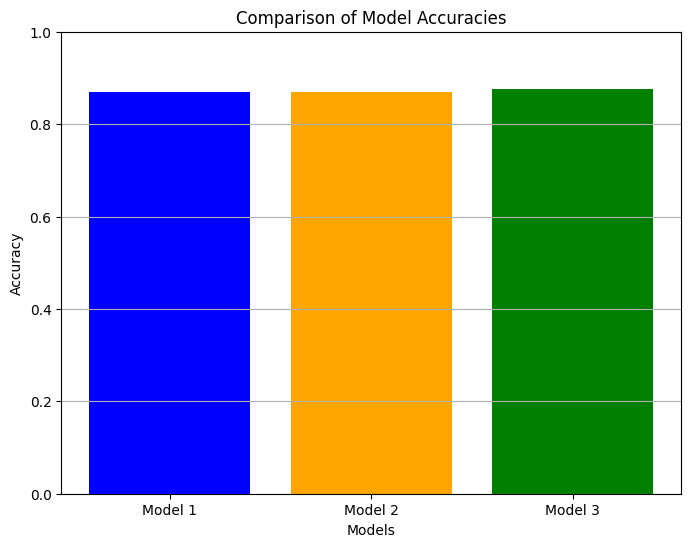

In [ ]:

model_names = ['Model 1', 'Model 2', 'Model 3']
accuracies = [accuracy_1, accuracy_2, accuracy_3]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()
